In [50]:
%matplotlib inline

In [ ]:
os.environ['GOOGLE_CRED_DIR']='/Users/mpeaton/'

In [45]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS']=os.path.join(os.environ['GOOGLE_CRED_DIR'],'apt-footing-235018-aeb185ac9e31.json')

KeyError: 'GOOGLE_CRED_DIR'

In [4]:
from google.cloud import bigquery
import bq_helper
import numpy_stats

In [8]:
github_repos = bq_helper.BigQueryHelper(active_project= "bigquery-public-data", 
                                       dataset_name = "github_repos")

In [9]:
github_repos.list_tables()

['commits',
 'contents',
 'files',
 'languages',
 'licenses',
 'sample_commits',
 'sample_contents',
 'sample_files',
 'sample_repos']

In [10]:
api_results = bq_helper.BigQueryHelper(active_project= "apt-footing-235018", 
                                       dataset_name = "NumpyAPI")

In [11]:
github_repos.table_schema('files')

,name,type,mode,description
0,repo_name,STRING,NULLABLE,None
1,ref,STRING,NULLABLE,None
2,path,STRING,NULLABLE,None
3,mode,INTEGER,NULLABLE,None
4,id,STRING,NULLABLE,None
5,symlink_target,STRING,NULLABLE,None


Query Constructed for API functions..  

In [34]:
from numpy_stats import *
funs = funs[:5]
query = build_countAPIs(funlist=funs,api_table=
                        nest_table(
                            build_numpyAPI_query(
                                funlist=funs,content_table = nest_table(
                                    build_py_content(join=join_py())
                                ))))
print(query)

SELECT
count(CASE WHEN numpy_abs THEN 1 END) AS numpy_abs_count,
count(CASE WHEN numpy_absolute THEN 1 END) AS numpy_absolute_count,
count(CASE WHEN numpy_absolute_import THEN 1 END) AS numpy_absolute_import_count,
count(CASE WHEN numpy_add THEN 1 END) AS numpy_add_count,
count(CASE WHEN numpy_add_docstring THEN 1 END) AS numpy_add_docstring_count
FROM (SELECT
REGEXP_MATCH( c.content,r'abs\(\s?[A-Za-z0-9_]+\s?[.,/)]') AS numpy_abs,
REGEXP_MATCH( c.content,r'absolute\(\s?[A-Za-z0-9_]+\s?[.,/)]') AS numpy_absolute,
REGEXP_MATCH( c.content,r'absolute_import\(\s?[A-Za-z0-9_]+\s?[.,/)]') AS numpy_absolute_import,
REGEXP_MATCH( c.content,r'add\(\s?[A-Za-z0-9_]+\s?[.,/)]') AS numpy_add,
REGEXP_MATCH( c.content,r'add_docstring\(\s?[A-Za-z0-9_]+\s?[.,/)]') AS numpy_add_docstring
FROM (SELECT
*
FROM
[bigquery-public-data:github_repos.sample_contents] AS c
INNER JOIN
(SELECT
*
FROM
[bigquery-public-data:github_repos.sample_files] AS f
WHERE
(
f.path LIKE '%.py' 
OR
f.path LIKE '%.ipynb'
) ) AS p


In [47]:
### AFter copying and pasting the above query into BigQuery and saving as sample_results... 

In [49]:
#Pull data from bigQuery
#r = api_results.query_to_pandas_safe('SELECT * FROM `apt-footing-235018.NumpyAPI.sample_results`')
#r

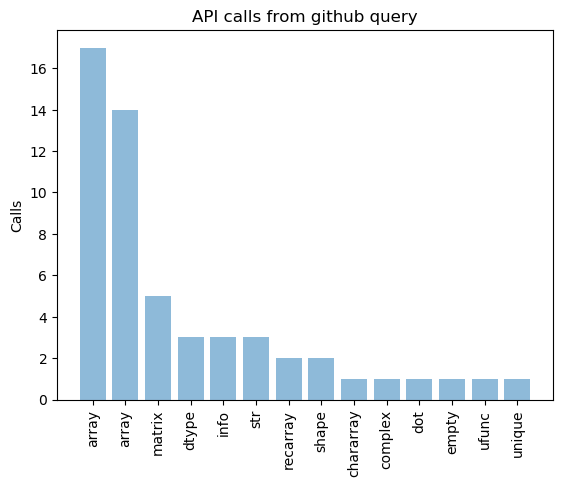

In [51]:
import pandas as pd
r = pd.read_csv('results-20190322-101605.csv').T
r2 = r.loc[r[0]>0].sort_values(0,ascending=False)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
funs = list(r2.index)
funs = [ f.split('_')[1] for f in funs]
y_pos = np.arange(len(funs))
calls = r2[0]
 
plt.bar(y_pos, calls, align='center', alpha=0.5)
plt.xticks(y_pos, funs,rotation='vertical')

plt.ylabel('Calls')
plt.title('API calls from github query')
 
plt.show()

In [52]:
r2

,0
numpy_array_count,17
numpy_array_equal_count,14
numpy_matrix_count,5
numpy_dtype_count,3
numpy_info_count,3
numpy_str_count,3
numpy_recarray_count,2
numpy_shape_count,2
numpy_chararray_count,1
numpy_complex_count,1
